<a href="https://colab.research.google.com/github/UladzislauKazlouski/digons/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scientist Associate Practical Exam

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [ ]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above
# Start coding here...



In [ ]:
##A little note before I begin: I'm deeply sorry for my poor English.##

#import all necessery modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

In [ ]:
#loading data as DataFrame with pandas
df = pd.read_csv('data/fitness_class.csv')
#setting class capacity to 25 max, if have more - reset to 25
df['class_capacity'][df['class_capacity'] > 25] = 25
#dropping rows with average age of group smaller than 14
df = df.drop(df[df['age'] < 14].index, axis = 0)

In [ ]:
#look at the data

print(df.head())
#look at most summary charestics
print(df.describe())
#look at datatypes, missing data
print(df.info())

  day_of_week time class_category  class_capacity  days_before  attendance  \
0         Wed   AM           Yoga              15            1           8   
1         Sun   PM           Aqua              15            3           8   
2         Mon   AM           Aqua              15            5          10   
3         Sun   PM       Strength              25            3          18   
4         Mon   AM           Yoga              15            5          10   

    age  new_students  over_6_month  
0  31.1             6             4  
1  27.0             7             8  
2  22.4             8             7  
3  23.5             7             9  
4  29.8             5             7  
       class_capacity  days_before  attendance         age  new_students  \
count      762.000000   762.000000  762.000000  762.000000    762.000000   
mean        17.506562     2.547244    9.519685   29.163648      5.912073   
std          4.336755     1.355768    3.841164    5.812547      1.788821   

In [ ]:
#Number of duplicates in the data
print(df.duplicated().sum())

#Number of missing values in each column
print(df.isna().sum())

0
day_of_week       0
time              0
class_category    0
class_capacity    0
days_before       0
attendance        0
age               0
new_students      0
over_6_month      0
dtype: int64


In [ ]:
#Check for doublicated categories in columns class_category and day_of_week
print(df['class_category'].unique())
print(df['day_of_week'].unique())

#Add new column for age category
df['age_cat'] = pd.cut(df['age'], bins = [df['age'].min(),25,34,df['age'].max()], labels=['Youth','YoungAdults','Adults'], right = False).astype('category')

#Transforming days_of_week into categorical variable 
df['day_of_week'] = pd.Categorical(df['day_of_week'],categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered = True)

#Add a new column for weekend days
df['is_weekend'] = df['day_of_week'].isin(['Sat','Sun']).apply(lambda x: 1 if x else 0)

#Add a new column with the attendance rate rounded up to two decimals. 
df['att_rate'] = round(1-(df.class_capacity - df.attendance)/df.class_capacity,2)


['Yoga' 'Aqua' 'Strength' 'HIIT' 'Cycling']
['Wed' 'Sun' 'Mon' 'Tue' 'Thu' 'Sat' 'Fri']


In [ ]:
#Numerical columns summary: 
for k in df.keys():
    if df[k].dtype=='int64' or df[k].dtype=='float64':
        print(f'Range of "{" ".join(k.split(sep= "_")).capitalize()}" column is {df[k].max() - df[k].min()}, maximal value - {df[k].max()}, minimal value - {df[k].min()}, mean - {round(df[k].mean(),2)}, variance - {round(df[k].var(),2)}')    

Range of "Class capacity" column is 10, maximal value - 25, minimal value - 15, mean - 17.51, variance - 18.81
Range of "Days before" column is 4, maximal value - 5, minimal value - 1, mean - 2.55, variance - 1.84
Range of "Attendance" column is 17, maximal value - 21, minimal value - 4, mean - 9.52, variance - 14.75
Range of "Age" column is 34.8, maximal value - 48.8, minimal value - 14.0, mean - 29.16, variance - 33.79
Range of "New students" column is 10, maximal value - 11, minimal value - 1, mean - 5.91, variance - 3.2
Range of "Over 6 month" column is 11, maximal value - 13, minimal value - 2, mean - 7.57, variance - 3.88
Range of "Is weekend" column is 1, maximal value - 1, minimal value - 0, mean - 0.28, variance - 0.2
Range of "Att rate" column is 0.57, maximal value - 0.84, minimal value - 0.27, mean - 0.54, variance - 0.03


## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

*Write your description here* 

The first thing was to check the information that we had. There are no null values or duplicates in the data. The days of the week and time display an abbreviated weekday name and the AM or PM of the fitness class, respectively. Most of the data is numerically discrete (class capacity, days before, attendance, new students, over 6 months). After resetting all values of the class_capacity column that are higher than 25 to 25, and removing all data where the average age of the group is lower than 14, we can look at the summary of numeric features: The range of the "Attendance" column is 17, maximal value is 21, minimal value is 4, mean is 9.52, standard deviation is 3.84.
The range of the "Age" column is 34.8; the maximal value is 48.8; the minimal value is 14.0; the mean is 29.16; and the standard deviation is 5.81.
The range of the "new students" column is 10; the maximum value is 11; the minimum value is 1; the mean is 5.91; and the standard deviation is 1.79.
The "over 6 months" column has a range of 11, a maximum of 13, a minimum of 2, a mean of 7.57, and a standard deviation of 1.97.
Two new columns have been added for future analyses: age_cat, which divides the age column into three categories (youth, "young adults," and "adults," with years 14-24, 25-34, and 35-50, respectively; and att_rate, which displays the attendance rate (1-(capacity - attendance / capacity)).


In [ ]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 


In [ ]:
#setting color pallette and style of future plots
sns.set_palette('Set2')
sns.set_style('darkgrid')

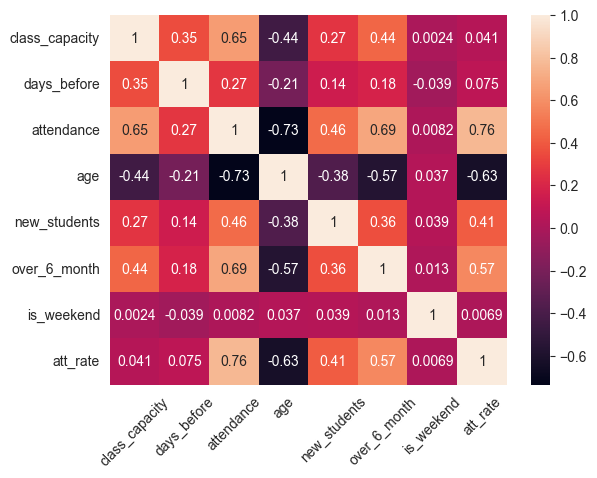

In [ ]:
#correlation of numeric values heatmap 
sns.heatmap(data = df.corr(),annot = True)
plt.xticks(rotation = 45)
plt.show()

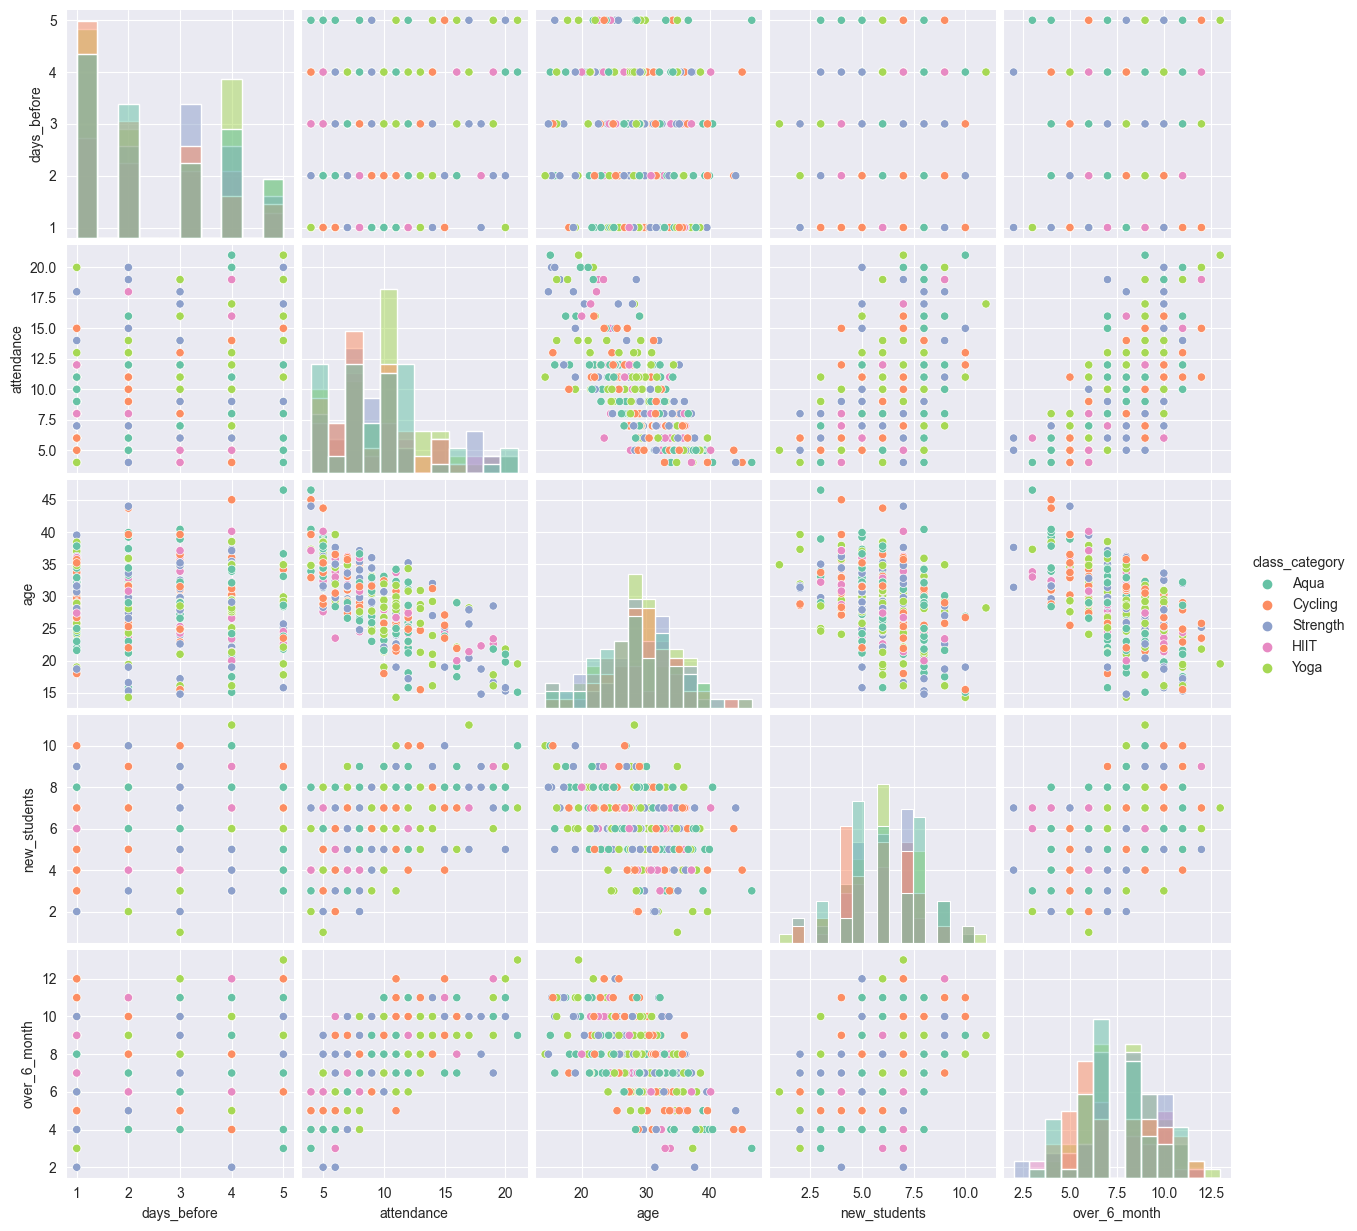

In [ ]:
#Pairplot for numerical features and differnt fitness classes with diagonal histogram 
sns.pairplot(df.drop(['att_rate','is_weekend','class_capacity'],axis = 1).sample(frac = 0.4),hue = 'class_category', diag_kind = 'hist')
plt.show()

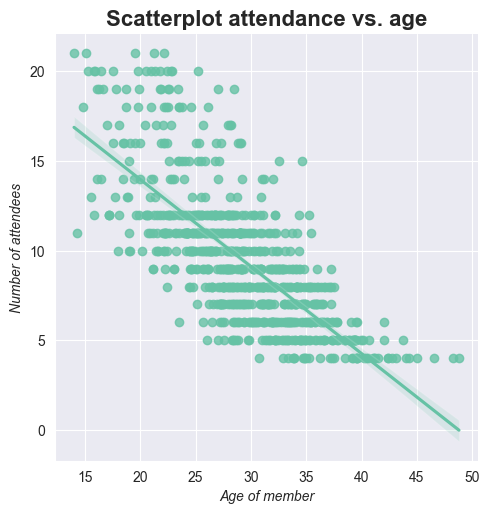

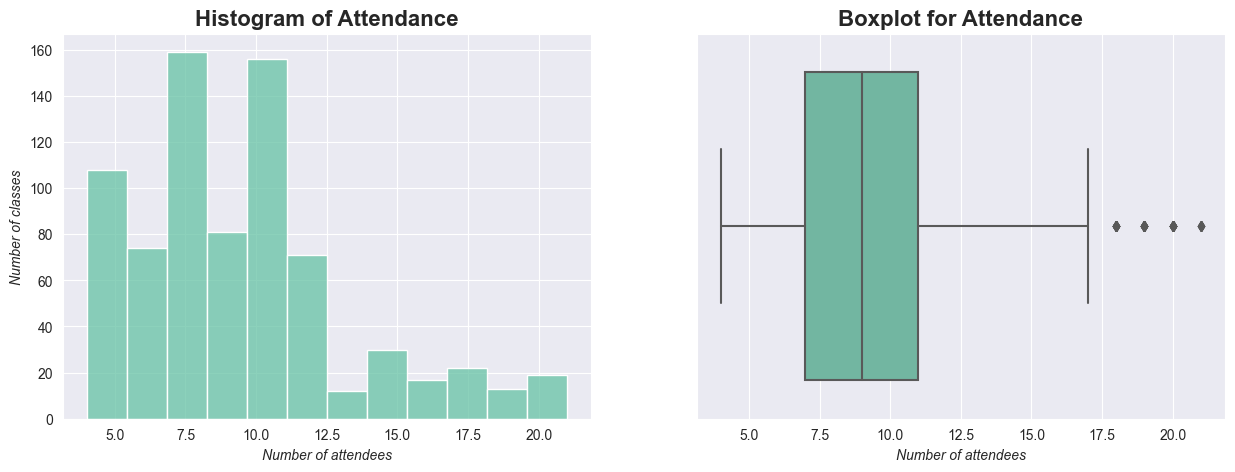

In [ ]:
#as we saw there is strong correlation between age and attendance let's build scatterplot
sns.lmplot(data = df, x = 'age', y = 'attendance')
plt.xlabel('Age of member',fontstyle = 'italic')
plt.ylabel('Number of attendees',fontstyle = 'italic')
plt.title('Scatterplot attendance vs. age',fontweight = 800,fontsize = 16)

#subplot to look at distribution of attendees
fig, (ax1,ax2) = plt.subplots(1,2, figsize =(15,5))

sns.histplot(data = df, x = 'attendance',bins = 12, ax = ax1)
ax1.set_xlabel('Number of attendees',fontstyle = 'italic')
ax1.set_ylabel('Number of classes',fontstyle = 'italic')
ax1.set_title('Histogram of Attendance',fontweight = 800,fontsize = 16)

sns.boxplot(data = df, x = 'attendance', ax = ax2)
ax2.set_xlabel('Number of attendees',fontstyle = 'italic')
ax2.set_title('Boxplot for Attendance',fontweight = 800,fontsize = 16)

ax2.sharex(ax1)
plt.show()

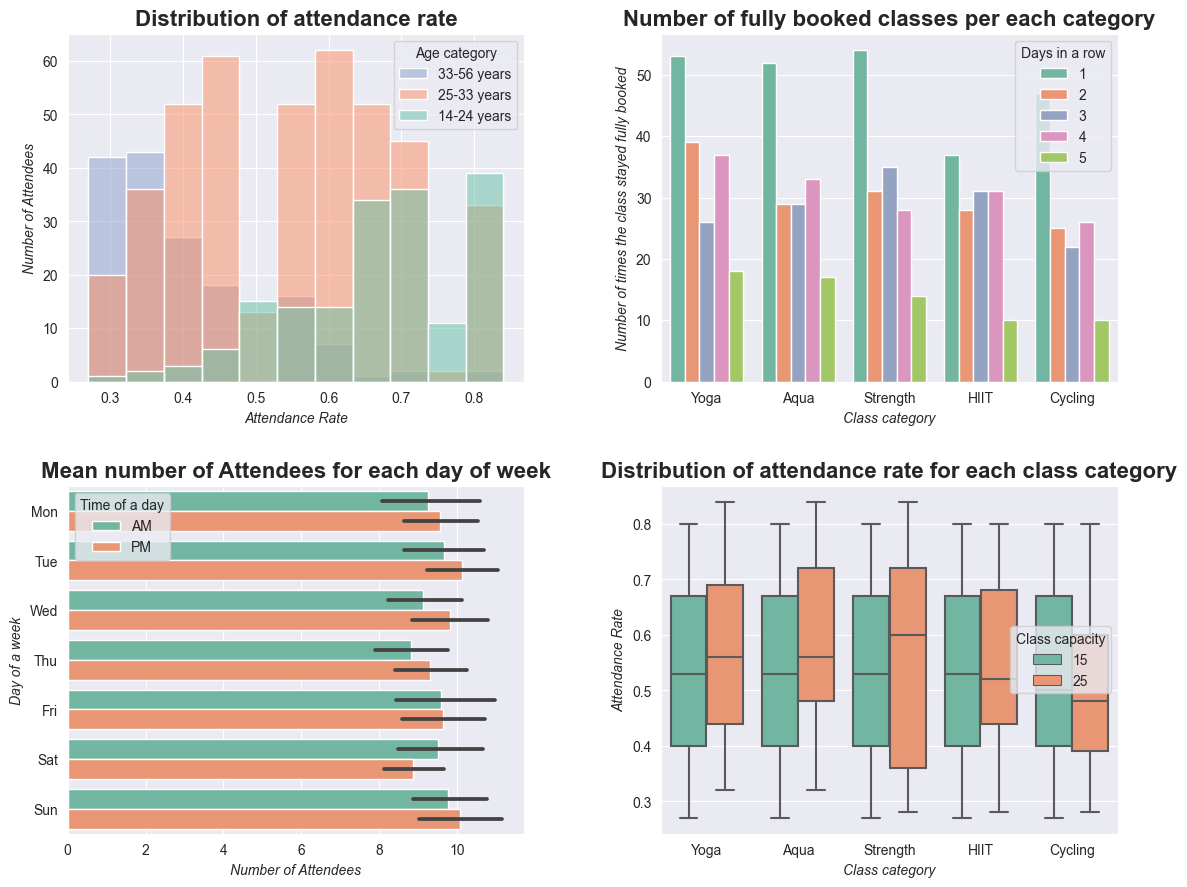

In [ ]:
# First - graph shows distribution of attendance rate with colored categories 
# Second - count of days in a row with fully booked classes per category
# Third - barplot of attendings for each day of week and locale
# Fourth - 
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (15,10))

#Distribution of attendance rate with colored categories
sns.histplot(data = df, x = 'att_rate',hue = 'age_cat', ax=ax1)
ax1.set_title('Distribution of attendance rate',fontweight = 800,fontsize = 16)
ax1.set_xlabel('Attendance Rate',fontstyle = 'italic')
ax1.set_ylabel('Number of Attendees',fontstyle = 'italic')
ax1.legend(title='Age category',labels = ['33-56 years','25-33 years','14-24 years'])

#Number of times with fully booked classes per category days in a row
sns.countplot(data = df, hue = 'days_before', x = 'class_category', ax = ax2)
ax2.set_title('Number of fully booked classes per each category',fontweight = 800,fontsize = 16)
ax2.set_xlabel('Class category',fontstyle = 'italic')
ax2.set_ylabel('Number of times the class stayed fully booked',fontstyle = 'italic')
ax2.legend(title ='Days in a row')

#Barplot of attendings for each day of week and locale
sns.barplot(data=df, y='day_of_week', x='attendance', hue = 'time', ax = ax3)
ax3.set_title('Mean number of Attendees for each day of week',fontweight = 800,fontsize = 16)
ax3.set_xlabel('Number of Attendees',fontstyle = 'italic')
ax3.set_ylabel('Day of a week',fontstyle = 'italic')
ax3.legend(title ='Time of a day')

#Distribution of attendance rate for each class category
sns.boxplot(data = df, x = 'class_category', y = 'att_rate',hue = 'class_capacity', ax = ax4)
ax4.set_title('Distribution of attendance rate for each class category',fontweight = 800,fontsize = 16)
ax4.set_xlabel('Class category',fontstyle = 'italic')
ax4.set_ylabel('Attendance Rate',fontstyle = 'italic')
ax4.legend(title ='Class capacity',loc = 'center right')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.8,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)
plt.show()

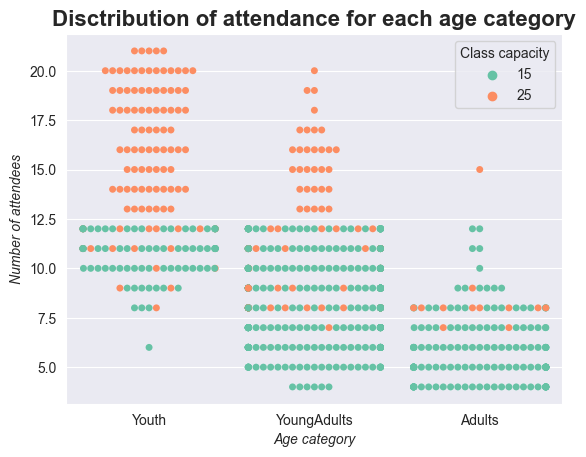

In [ ]:
#Swarmplot for different age categories to see correltion with attendancy 
sns.swarmplot(data = df, x = 'age_cat', y='attendance', hue ='class_capacity', palette = 'Set2')
plt.xlabel('Age category',fontstyle = 'italic')
plt.ylabel('Number of attendees',fontstyle = 'italic')
plt.title('Disctribution of attendance for each age category',fontweight = 800,fontsize = 16)
plt.legend(title ='Class capacity')
plt.show()

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of single variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*

I've created a heatmap of correlations as well as a pairplot of 40% sampled data to better understand the relationship between features.As we can see, attendance is strongly correlated with age and has a correlation coefficient of -0.73. The number of members over 6 months has a correlation coefficient of 0.69.
To delve deeper into the issue of low attendance, create a histogram and a box plot.We can see here that we never have a full class and that we even have outliners for the average number of attendees. The next step will be to understand our customers; let's look at the distribution of attendance rates for different age categories. as we see younger people attend classes more regularly.
The graph for "Number of fully booked classes per each category" shows which type of fitness is more popular; "HIIT" and "Cycling" are booked less than others, which can mean they're more demanding or less attractive.
According to the graph, "Mean number of attendees for each day of the week," we have roughly the same load on each day of the week.
The graph "Distribution of attendance rate for each class category" shows two patterns: for less intense exercises, the median attendance rate for classes with 15 people is lower than for classes with 25 people and remains roughly the same for less intense exercises.
Finally, consider the distribution of attendees by age group. As we see, groups in the "adult" category have much fewer attendees and almost never have groups with a capacity of 25 people, which can mean they have less passion to attend fitness classes.

In [ ]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 

In [ ]:
#Load all importance modules from sklean library
from sklearn.linear_model import Ridge,Lasso, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Data transforming to get better results

#Copying data to not interfere with original data 
df_ml = df.copy()

#OneHotEncoding for binary categories
time_dum = pd.get_dummies(df['time'],drop_first= True)
cap_dum = pd.get_dummies(df['class_capacity'],drop_first= True)

#LabelEncoding for remaining categorical features
df_ml['day_of_week'] = LabelEncoder().fit_transform(df_ml['day_of_week'])
df_ml['class_category'] = LabelEncoder().fit_transform(df_ml['class_category'])
df_ml['age_cat'] = LabelEncoder().fit_transform(df_ml['age_cat'])

#Merging all encoded features together
df_ml = pd.concat([df_ml,time_dum,cap_dum], axis = 1)

#Drop unencoded features
df_ml = df_ml.drop(['time','class_capacity'], axis = 1)

#Renaming columns after OneHotEncoding
df_ml = df_ml.rename(columns={'PM':'AM_PM',25:'Class_capacity'})


In [ ]:
#Split data into input and output features
X = df_ml.drop('att_rate',axis = 1)
y = df_ml[['att_rate']]

#Split data into training and testing set (20% test, 80% train)
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.8,stratify=y) 

#Estimator choosing
models ={'Ridge':Ridge(alpha=0.1),'Lasso':Lasso(alpha=0.1),'Linear':LinearRegression(),'Gradient Boost':GradientBoostingRegressor(),'Decision Tree': DecisionTreeRegressor()}

score_list = []
#loop to look at different estimators results
for k,mod in models.items():
     cv_score = cross_val_score(estimator=mod,X=X_train,y=y_train,scoring = 'neg_mean_squared_error',cv=5)
     score_list.append(-cv_score.mean())
     print(f'{-cv_score.mean()} - mean score for {k.lower()} regression.\n')
print(f'Best estimator for this model is: {list(models)[score_list.index(min(score_list))]}')

0.001387667817281319 - mean score for ridge regression.

0.01147170142371432 - mean score for lasso regression.

0.0013878091342897087 - mean score for linear regression.

7.5017442980990555e-06 - mean score for gradient boost regression.

7.868852459016421e-06 - mean score for decision tree regression.

Best estimator for this model is: Gradient Boost


## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

*Write your description here*

Our goal is to predict the attendance rate for each fitness class; for this purpose, on the stage of "data validation," I've created a feature called "attendance rate," which will be our output value. This is a continuous numeric variable limited by 0 and 1.
For feature fitting, we have to encode our categorical columns. For binary categories, One hot encoder: these columns are "time" and "class_capacity." Label encoder was used for columns with more than two categories. I've used two different encoders to get the best understanding of the importance of features after model evaluation.
To train our model, we must divide the data into two sets: train and test. We use train_test_split on 80% of the train data and 20% of the data, stratified by output value y. 
Because we have a continuous variable as an output, this is a task for the regression model. To select the best regressor, we created a loop with the regressors "Ridge," "Lasso," "Linear," "Gradient Boost," and "Decision Tree."They represent different types of regressors. To select the best of them, let's use a cross-validation score with the scoring method "negative mean squared error" because we want to minimize error for predicted values (root mean squared error is not an option because we have small error values).
After running a loop of models, the best estimator is the Decision Tree Regressor because this estimator has minimal error.

In [ ]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Start coding here... 

In [ ]:
#Tuning parameters for best estimator
dtr = DecisionTreeRegressor()
params = {'min_samples_leaf':[10,15,20,25,30],'min_impurity_decrease':np.linspace(0,0.2,10), 'max_depth':[2,3,4,5]}
cv_dtr = GridSearchCV(estimator=dtr,param_grid=params,cv = 5,n_jobs = -1)

#Fitting data
cv_dtr.fit(X_train,y_train)
y_pred = cv_dtr.predict(X_test) 
print(f'Best decision tree regressor parameters: {cv_dtr.best_params_}')

#Check for overfitting
print(f'Train score {cv_dtr.score(X_train,y_train)}')
print(f'Test score {cv_dtr.score(X_test,y_test)}')

Best decision tree regressor parameters: {'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10}
Train score 0.9975641146581044
Test score 0.997318358139723


In [ ]:

#look at most important feature
feat_imp = pd.DataFrame(index = X.columns, data = cv_dtr.best_estimator_.feature_importances_, columns = ['value']).sort_values('value', ascending=False)
print(feat_imp)

                       value
attendance      9.207573e-01
Class_capacity  7.923766e-02
class_category  4.995999e-06
new_students    9.387745e-15
day_of_week     6.881342e-16
over_6_month    6.933342e-17
days_before     0.000000e+00
age_cat         0.000000e+00
is_weekend      0.000000e+00
AM_PM           0.000000e+00
age            -2.501203e-15


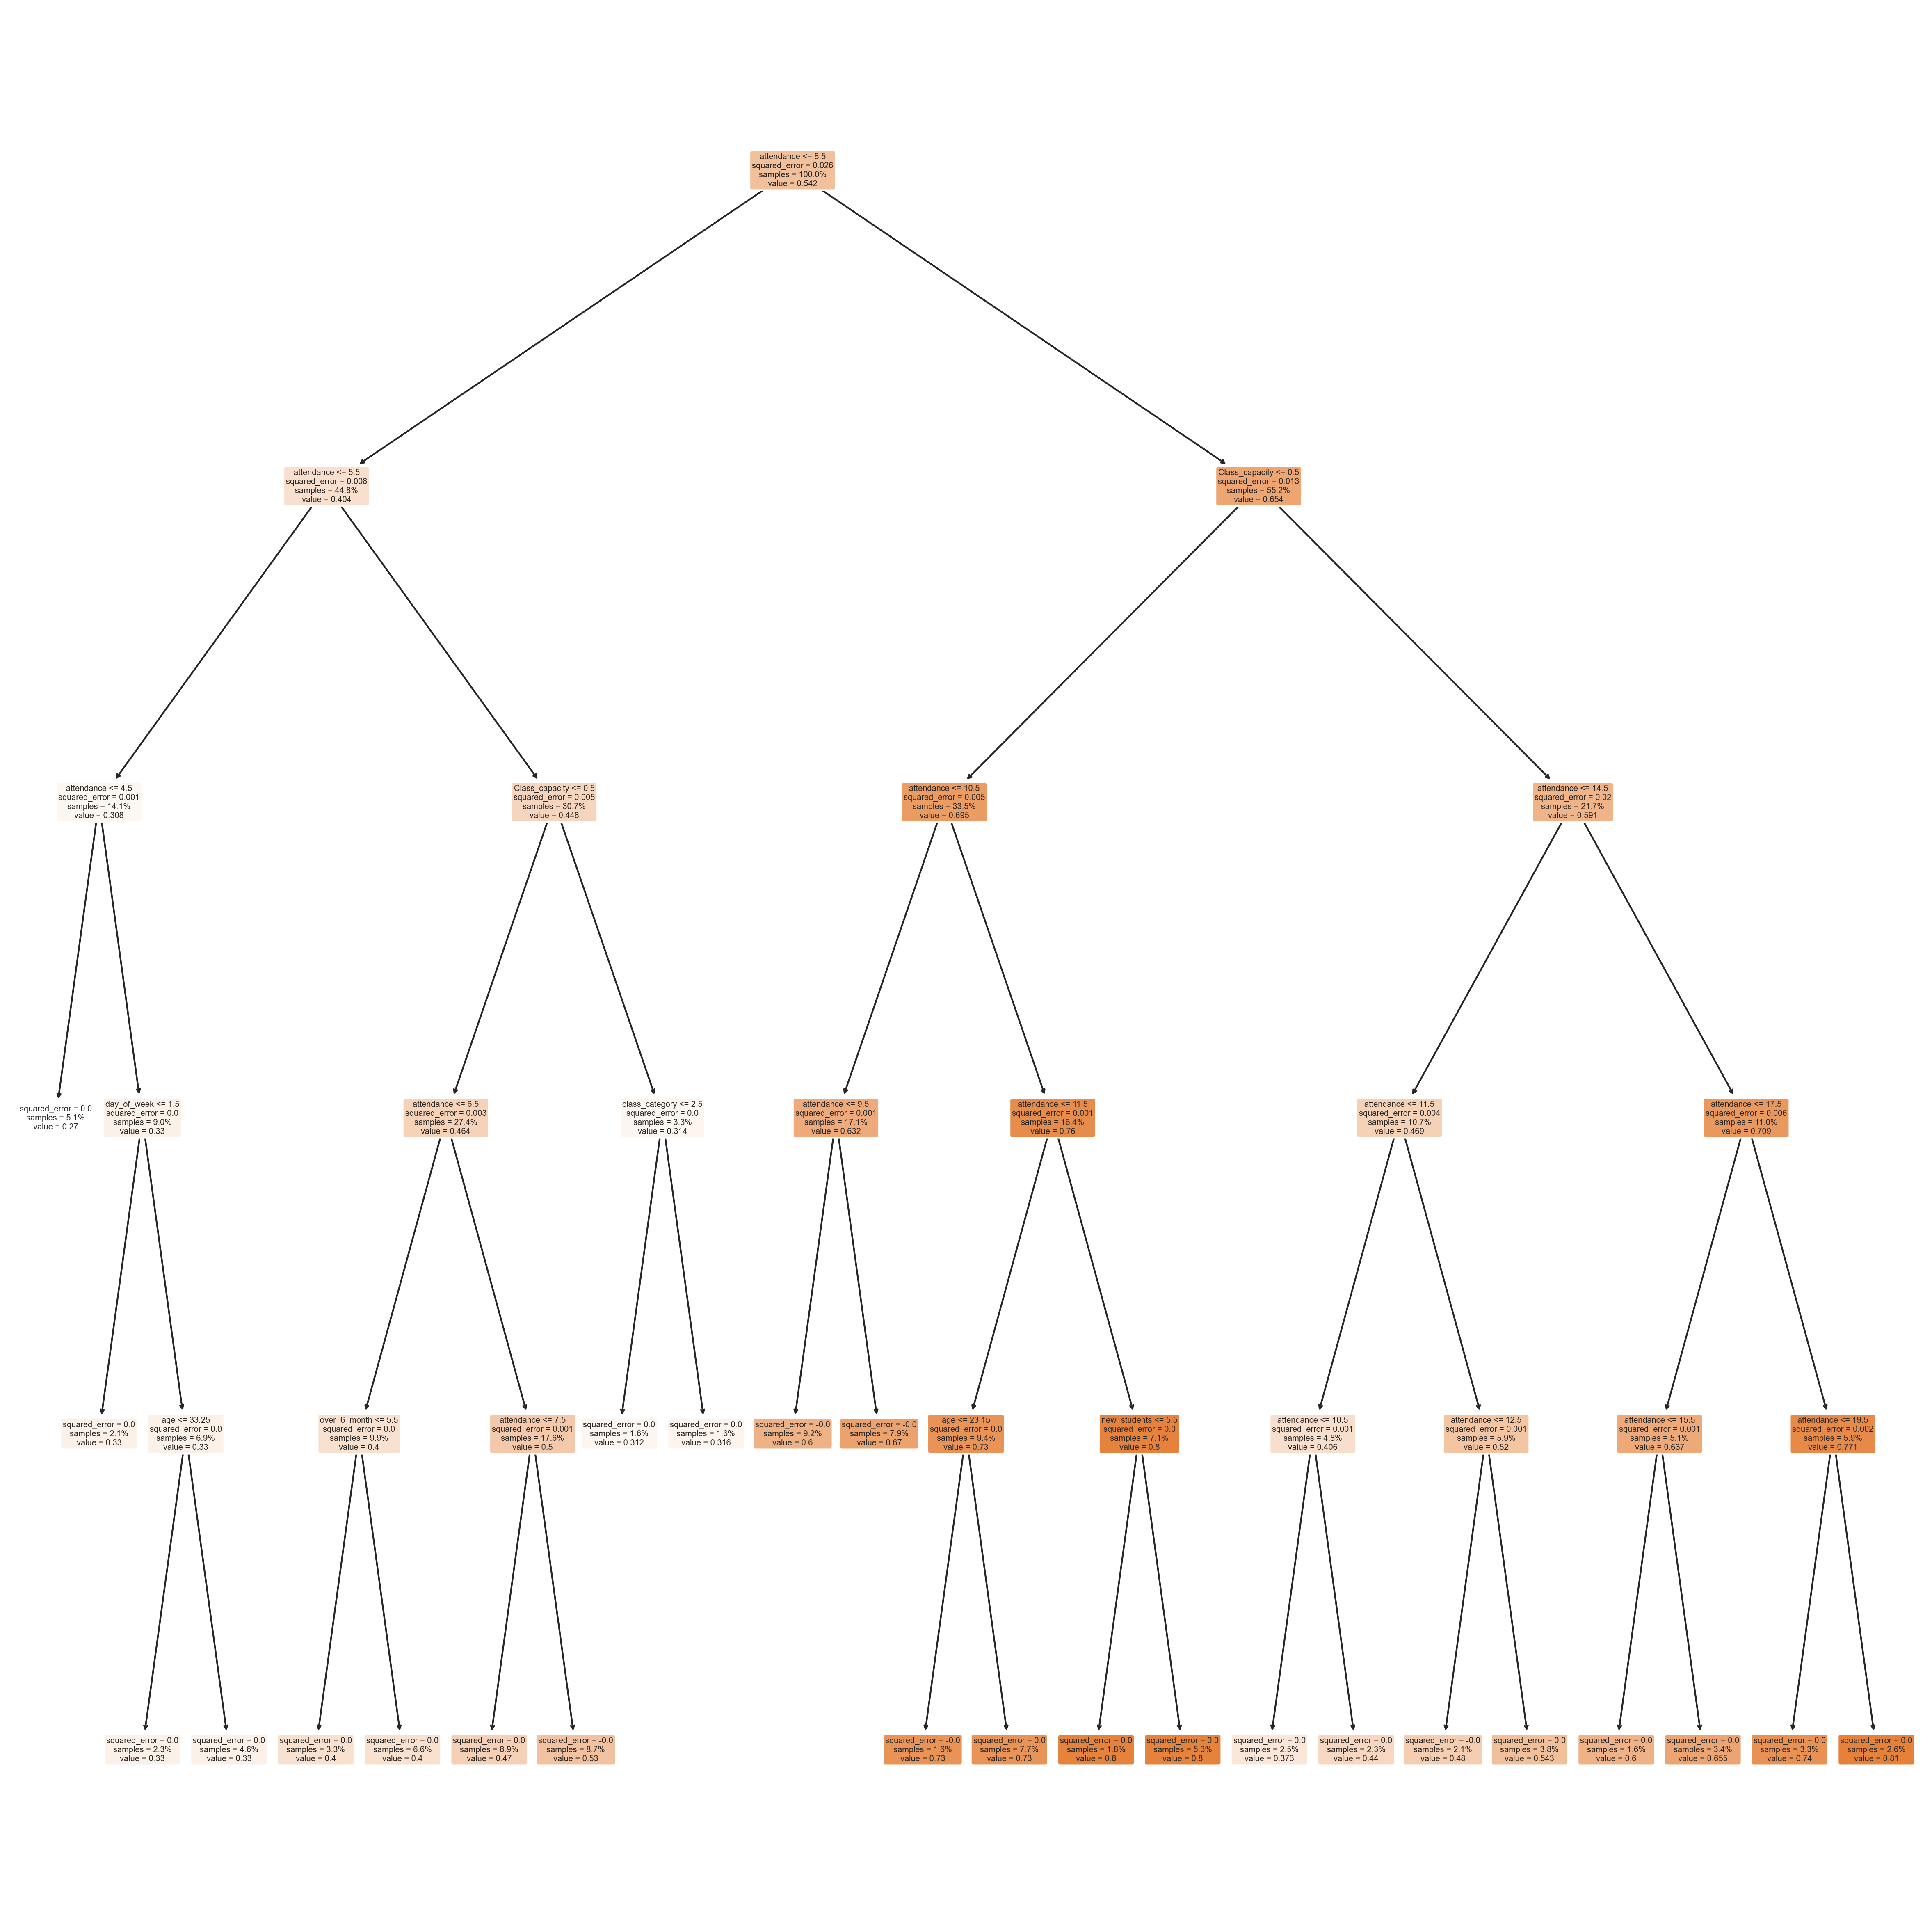

In [ ]:
#plotted Tree for best estimator parameters
plt.figure(figsize = (20,20), dpi=300)
plot_tree(cv_dtr.best_estimator_, feature_names = X.columns, filled =True, proportion = True, rounded = True)
plt.show()

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

*Write your description here*

After choosing the Dicision Tree Regressor because it has the lowest "mean squared error", let's tune the parameters of this model with the use of GridSearchCV. Our goal is to minimize error and resolve the bias-variance problem. Tuning parameters include min_samples_per_leaf (the number of samples per leaf) and max_depth (the maximum depth of the tree).To avoid overfitting, the minimum value for min_samples_leaf is 10 (which represents 6% of training data).
Grid search yielded the following results: "max_depth" = 5, "min_samples_leaf" = 10, and "max_samples_leaf" = 10.
To see if that result gave us good results, let's check the coefficient of determination for training and testing data: train score: 0.9975, test score of 0.9973. We see that the model is not overfitted, and we can use these parameters.
The importance of features shows that "attendance" and "class_capacity" have the highest rates.
A tree has been plotted to see how the data got split.

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam